<a href="https://colab.research.google.com/github/Mubasshir-Ali/Deep_Learning_Practice/blob/master/MNIST_Dataset_Classifying_Cloth_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (3.0.0)


In [0]:
import tensorflow as tf

In [0]:
# Import Tensorflow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
#@title Import The Fashion MNIST Dataset

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
#@title Explore the data


In [122]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
#@title Preprocess The Data


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

In [0]:
#@title Explore The Processed Data


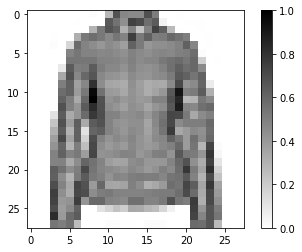

In [124]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

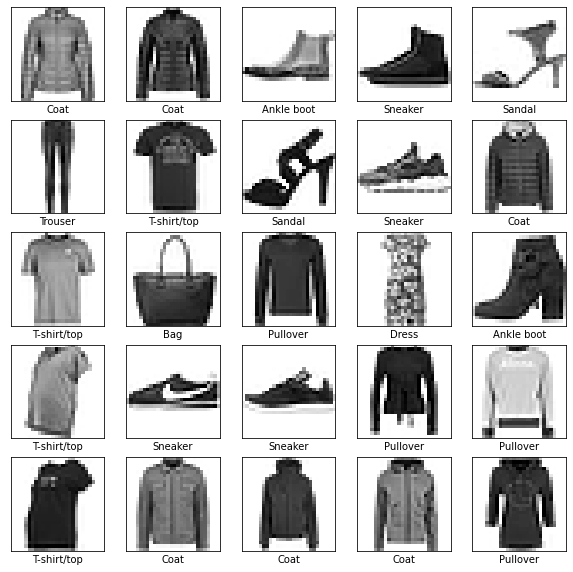

In [125]:
"""plt.figure(figsize = (10, 10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28, 28))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()"""
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
#@title Build The Model


In [0]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
                            tf.keras.layers.Dense(128, activation = tf.nn.relu),
                            tf.keras.layers.Dense(10)
                            ])

In [0]:
#@title Compile The Model


In [0]:
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

In [0]:
#@title Train The Model


In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [129]:
model.fit(train_dataset, epochs = 5, step_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5031 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3773 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8906


In [0]:
#@title Evaluate Accuracy


In [130]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
print('Accuracy On Test Dataset:' , test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3579 - accuracy: 0.8684
Accuracy On Test Dataset: 0.868399977684021


In [0]:
#@title Make Predictions And Explore


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [132]:
predictions.shape

(32, 10)

In [133]:
predictions[0]

array([ -1.8554165,  -4.586167 ,   3.911799 ,  -4.3123565,   7.777556 ,
       -12.3741255,   6.3569007, -14.12697  ,  -2.1243348, -12.568002 ],
      dtype=float32)

In [134]:
np.argmax(predictions[0])

4

In [135]:
test_labels[0]

4

In [136]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  predictions_array = tf.nn.softmax(predictions_array)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)
  
  def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    predictions_array = tf.nn.softmax(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


'def plot_image(i, predictions_array, true_labels, images):\n  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]\n  predictions_array = tf.nn.softmax(predictions_array)\n  plt.grid(False)\n  plt.xticks([])\n  plt.yticks([])\n  \n  plt.imshow(img[...,0], cmap=plt.cm.binary)\n\n  predicted_label = np.argmax(predictions_array)\n  if predicted_label == true_label:\n    color = \'blue\'\n  else:\n    color = \'red\'\n  \n  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],\n                                100*np.max(predictions_array),\n                                class_names[true_label]),\n                                color=color)\n\ndef plot_value_array(i, predictions_array, true_label):\n  predictions_array, true_label = predictions_array[i], true_label[i]\n  predictions_array = tf.nn.softmax(predictions_array)\n  plt.grid(False)\n  plt.xticks([])\n  plt.yticks([])\n  thisplot = plt.bar(range(10), predictions_array, color="#777777

'i = 0\nplt.figure(figsize=(6,3))\nplt.subplot(1,2,1)\nplot_image(i, predictions, test_labels, test_images)\nplt.subplot(1,2,2)\nplot_value_array(i, predictions, test_labels)'

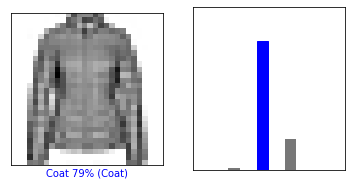

In [137]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

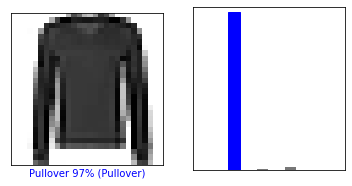

In [138]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

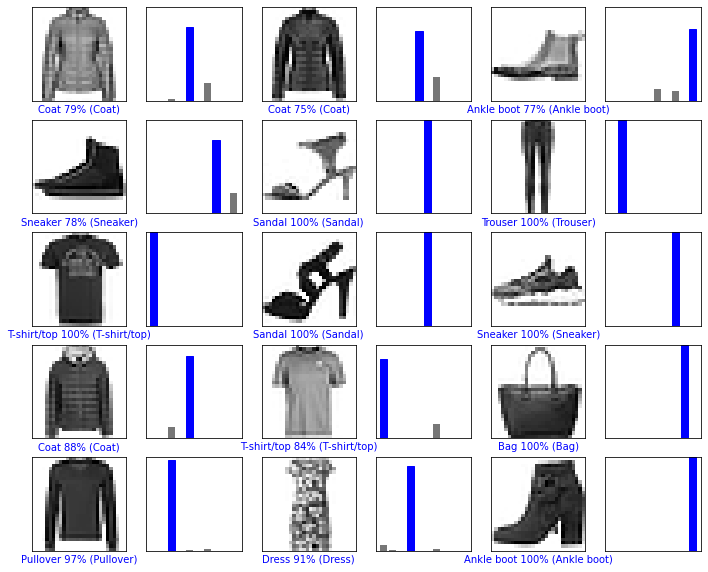

In [139]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [140]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [141]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [142]:
predictions_single = model.predict(img)

print(predictions_single)

[[ -1.8554167  -4.5861673   3.9117982  -4.3123555   7.777555  -12.374125
    6.356901  -14.126967   -2.1243346 -12.568001 ]]


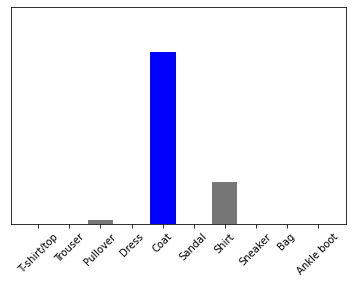

In [143]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [144]:
np.argmax(predictions_single[0])

4